<a href="https://colab.research.google.com/github/AmmaraYounas/ML-Projects/blob/main/Cardio_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#importing sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#import Evaluation Metrices
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [ ]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df['target'].value_counts() ## to know much each category is

1    526
0    499
Name: target, dtype: int64

<Axes: >

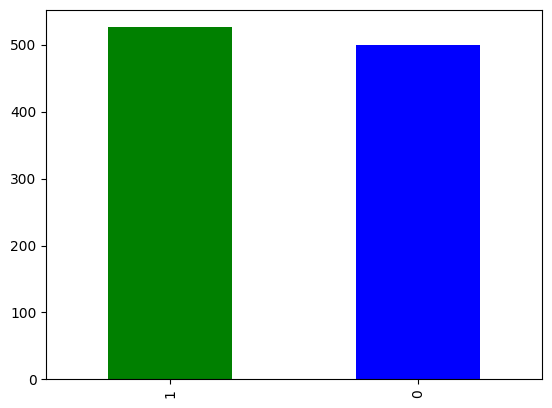

In [ ]:
df['target'].value_counts().plot(kind='bar',color=['green','blue'])

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
len(df)

1025

In [ ]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,86,226
1,413,300


In [ ]:
226/312 ##% of women have disease

0.7243589743589743

In [ ]:
300/713

0.42075736325385693

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

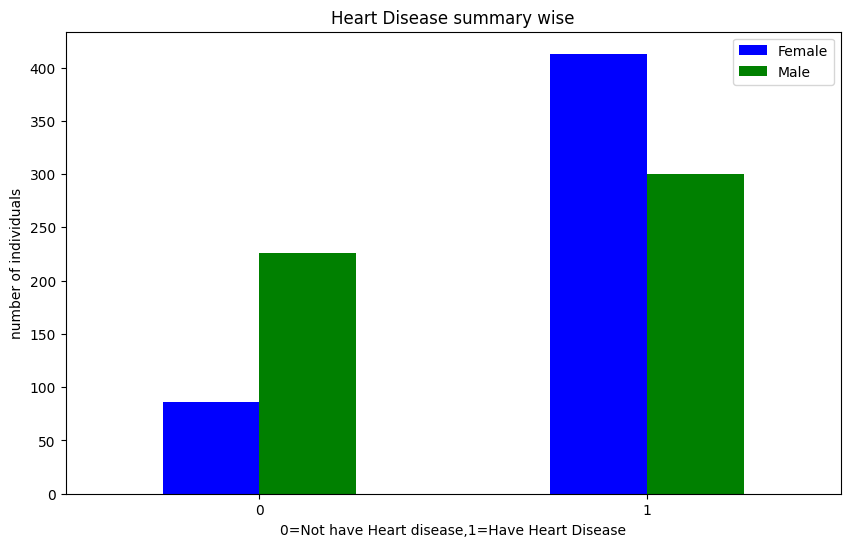

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind='bar',color=['blue','green'],figsize=(10,6));

plt.title('Heart Disease summary wise')
plt.xlabel('0=Not have Heart disease,1=Have Heart Disease')
plt.ylabel('Target')
plt.ylabel('number of individuals')
plt.legend(['Female','Male']);# by knowing female is 0 and male is 1
plt.xticks(rotation=0)## for rotating x axis labels

##this graph shows that no of women who have heart disease are much more high than that of men

**Comparison between Age and Thalach**

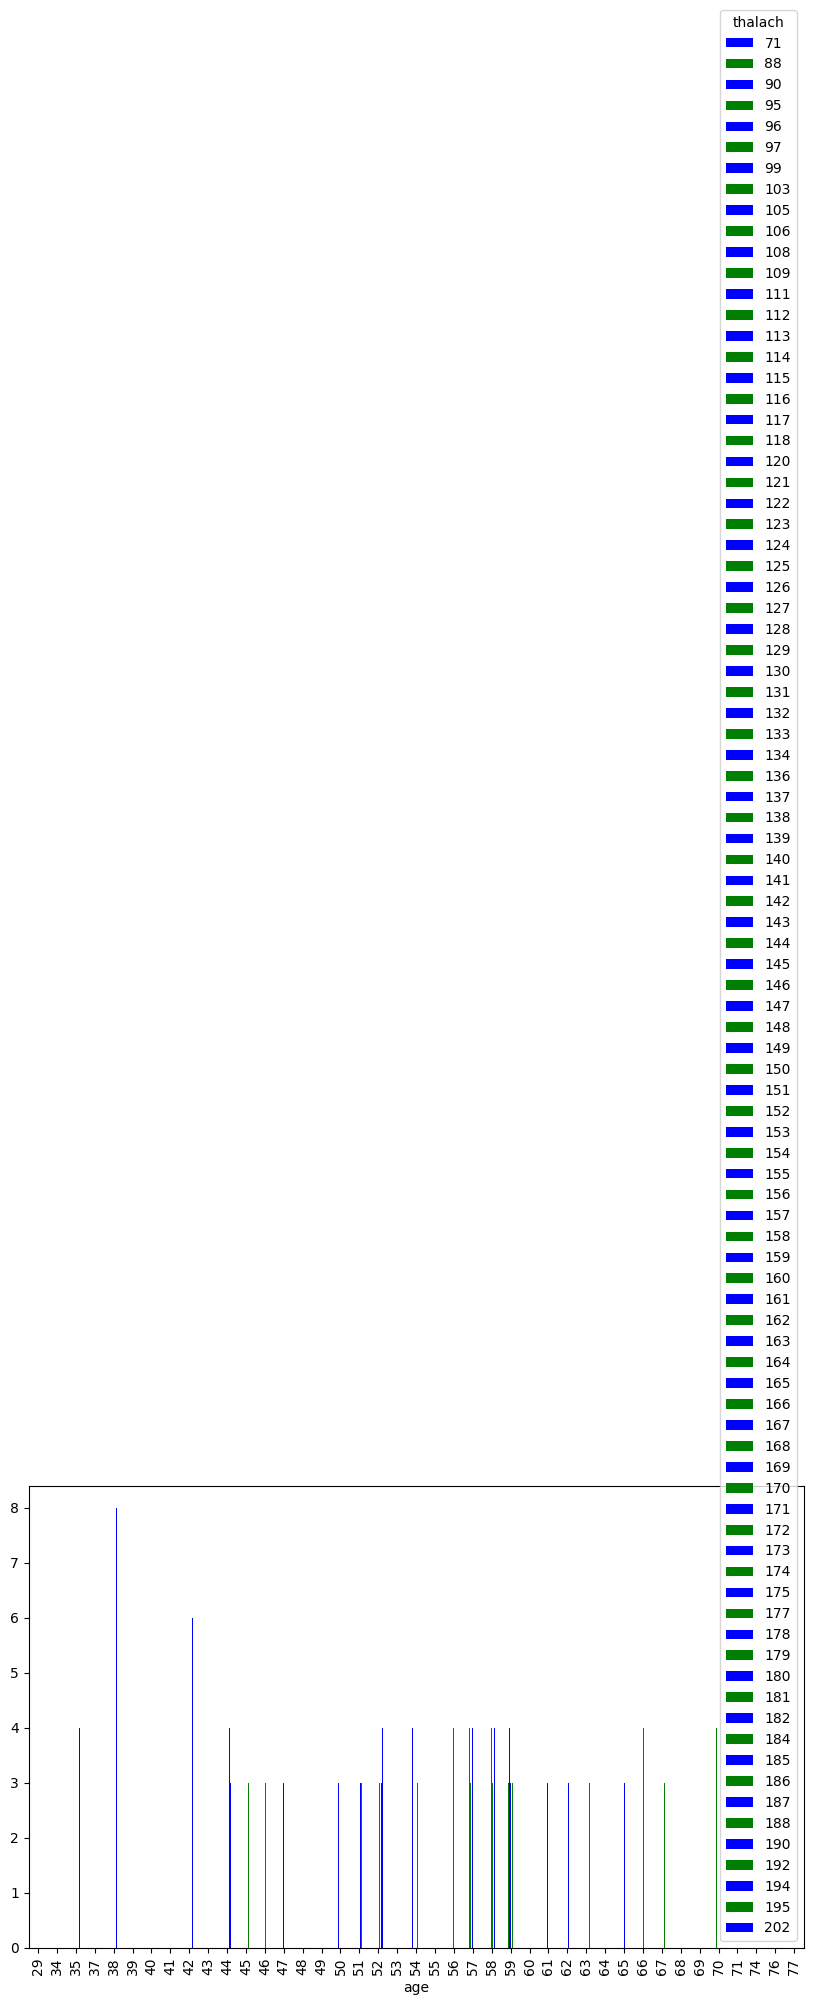

In [ ]:
pd.crosstab(df.age,df.thalach).plot(kind='bar',color=['blue','green'],figsize=(10,6));

Theres a problem, to see the comparison between age and thalach we should an appropriate graph The bar is for categorical data whereas the thalach and age both has discrete values(numeric and whole number)

##Choosing a scatter plot

Text(0, 0.5, 'Heart Rate')

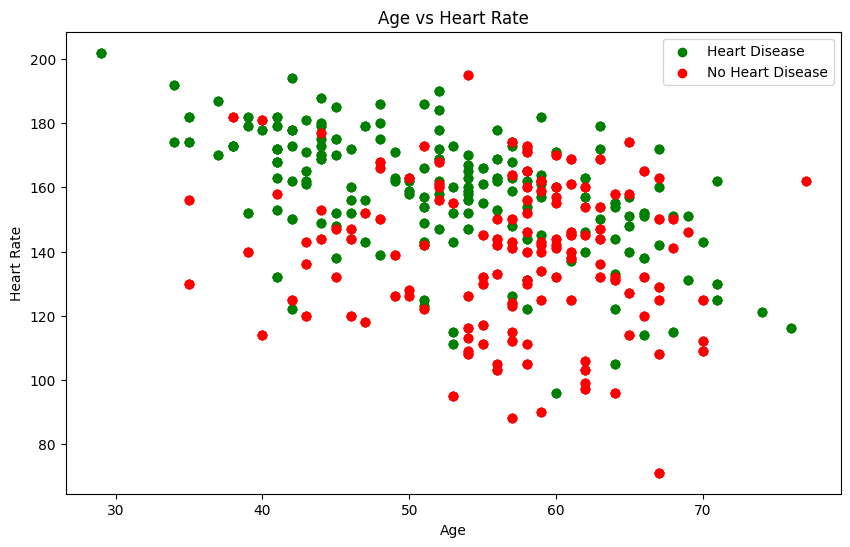

In [ ]:
# first defing the size
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='green');# thalach is max heart rate
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='red');
plt.legend(['Heart Disease','No Heart Disease'])## by knowing green is above, red is below

plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')

## we concluded from the graph that higher the age, lower the heart rate and have heart Disease

## performing age distribution

<Axes: >

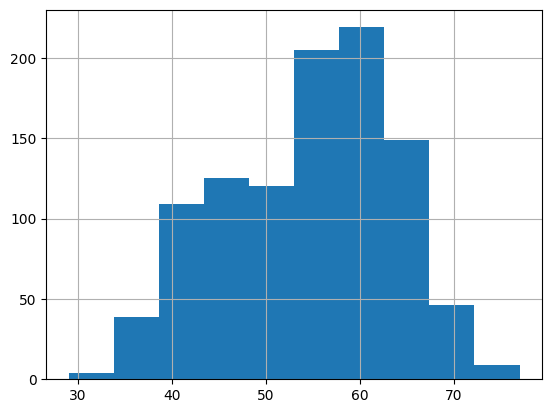

In [ ]:
df.age.hist()

## * the graph is telling it comprises more data high aged people
##if guassian distribution or the higher concentration lies on around 50 we would conclude that age has nothing to do with heart disease
## * in this graph the gd(guassian distributiomn) is skewed to the right or to higher age so higher the age higher the chances of disease
##in this graph theres no outlier

In [ ]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

0- Typical angina: chest pain due to low bp
1- Atypical angina: chest pain not related to Heart prob
2- non-anginal pain: not Heart related
3-asymptomatic chest pain not showing heart problem

**Chest Pain vs Heart Disease**

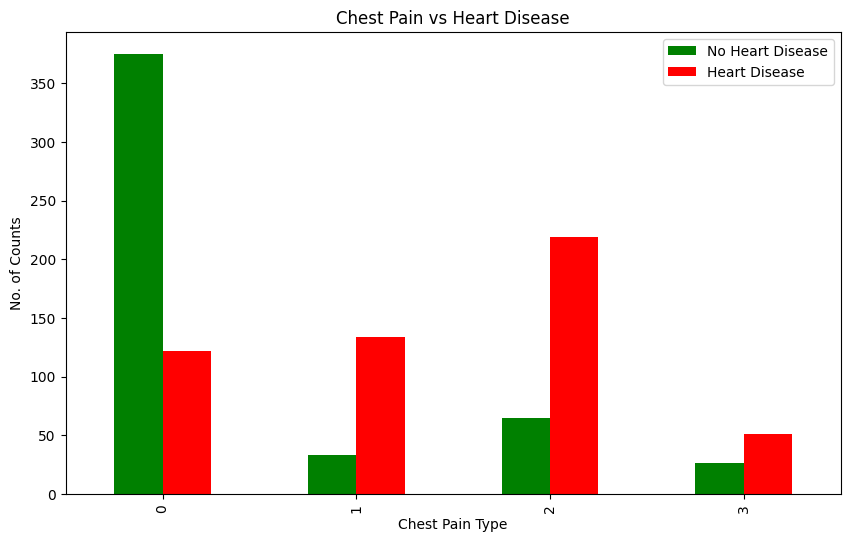

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['green','red'],figsize=(10,6))
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of Counts')
plt.legend(['No Heart Disease','Heart Disease'])

## * from the data we concluded that ratio between each pain type is increasing along chest pain type
## * except type 1
## * So heart disease depend on type of chest pain

# **Correlation Matrix**

1.   on diagnal the val is max =1
2.   **+(pos) correlation**: direct relation (a friend): when a val increases the other also increases and when dec other dec
3.   **-(neg) correlation**: inverse relation (an enemy) : when a val decreses other increases when one increases other decreases





In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


Heatmap of corr matrix

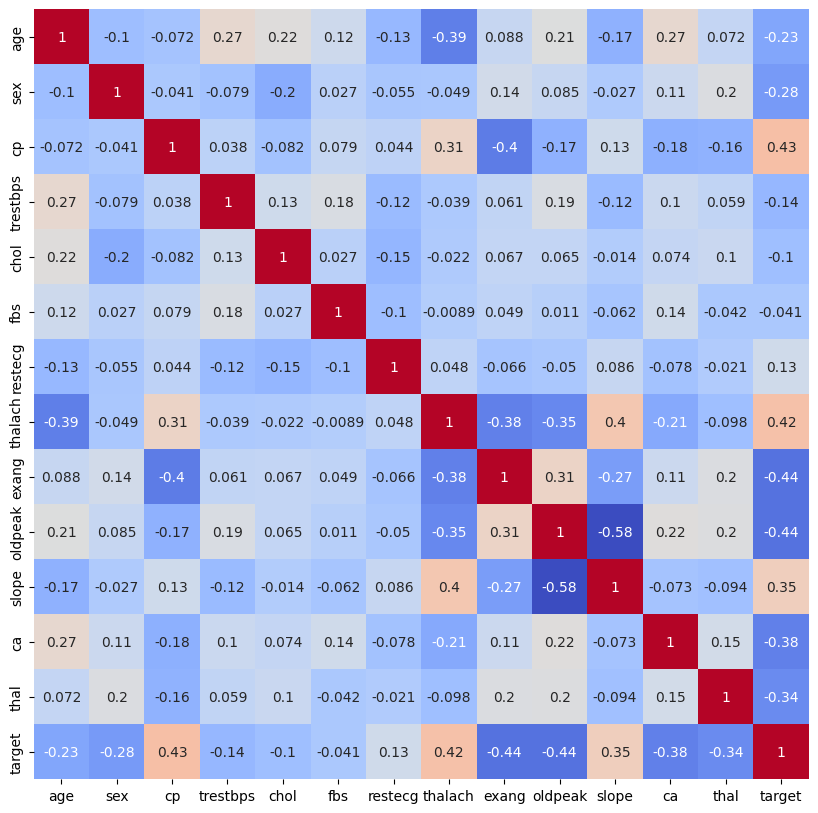

In [ ]:
corr_map=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(corr_map,
                    annot=True,
                    cbar=False,
                    cmap='coolwarm')

**Splittion of data**

In [ ]:
x=df.drop('target',axis=1)
y=df.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
np.random.seed(7)## so that other can produce the same result

**choosing the model**

In [ ]:
# defining a dictionary of models
models={'KNN':KNeighborsClassifier(),'Random Forest':RandomForestClassifier(),'Logistic Regression':LogisticRegression()}

In [ ]:
#testing the models using a function
def fit_and_score(models,x,x_test,y,y_test):
  np.random.seed(7)
  model_score={}
  for name,model in models.items():
    model.fit(x,y)
    model_score[name]=model.score(x_test,y_test)

  return model_score

In [ ]:
score=fit_and_score(models,x_train,x_test,y_train,y_test)
score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7365853658536585,
 'Random Forest': 1.0,
 'Logistic Regression': 0.8634146341463415}

**Mapping the models**

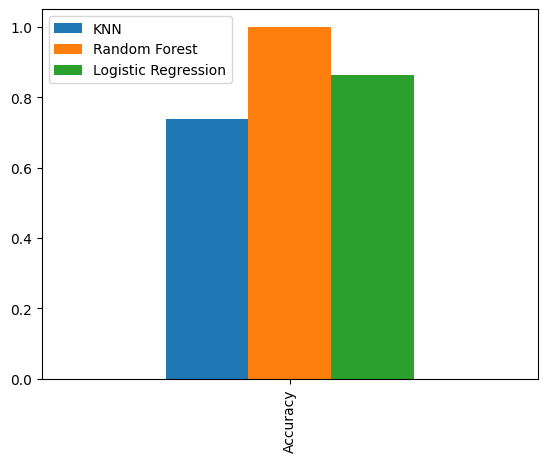

In [ ]:
pd.DataFrame(score,index=['Accuracy']).plot.bar();


**Improving the Model**

In [ ]:
##Improving knn
knn=KNeighborsClassifier()


In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
train_score=[]
test_score=[]

neighbors=range(1,30)

#defining a function for evaluating the improvement
def improve_knn(model,x,x_test,y,y_test):
  for n in neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(x,y)
    # appending the train score in a defined list
    train_score.append(knn.score(x_train,y_train))
    # appending the test score in a defined list
    test_score.append(knn.score(x_test,y_test))
  return train_score,test_score

In [ ]:
train_score,test_score=improve_knn(knn,x_train,x_test,y_train,y_test)
np.max(test_score)

1.0

**Plotting test**

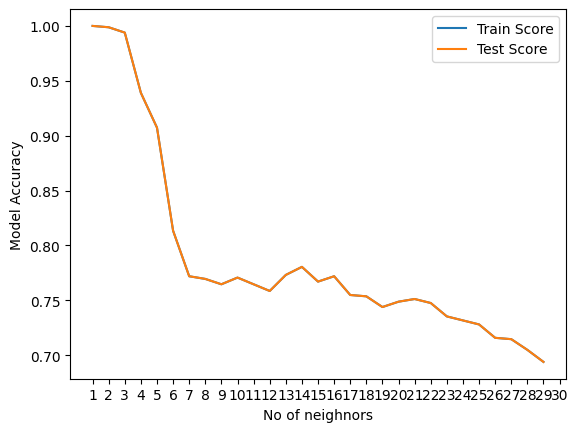

In [ ]:
plt.plot(neighbors,train_score,label='Train Score')
plt.plot(neighbors,train_score,label='Test Score')
plt.xticks(np.arange(1,31,1))
plt.xlabel('No of neighnors')
plt.ylabel('Model Accuracy')
plt.legend()

## here we have 100 accuracy when n_neighbors is 1

**Improving Logistic Regression using RSCV**

In [ ]:
## defining a dictionary for hyperparameters
lr={"C":np.logspace(-4,4,20),## smaller the value higher will be the result
    'solver':['liblinear']
    }

rscv=RandomizedSearchCV(LogisticRegression(),
                        param_distributions=lr,
                        verbose =True,
                        cv=5,
                        n_iter=20)

rscv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
## no improvement in result instead decreace is seen in result
rscv.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [ ]:
rscv.score(x_test,y_test)

0.8634146341463415

## **Evaluation using cv**

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=1)

In [ ]:
accuracy=np.mean(cross_val_score(KNN,x,y,cv=7,scoring='accuracy'))
precision=np.mean(cross_val_score(KNN,x,y,cv=7,scoring='precision'))
recall=np.mean(cross_val_score(KNN,x,y,cv=7,scoring='recall'))
f1=np.mean(cross_val_score(KNN,x,y,cv=7,scoring='f1'))

<Axes: title={'center': 'comparison of Matrices'}>

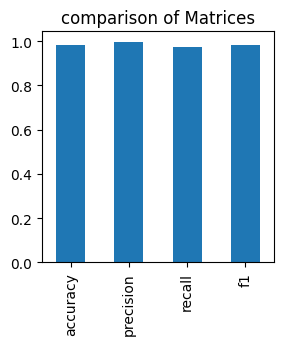

In [ ]:
plot_cv=pd.DataFrame(data={
    "accuracy":accuracy,
    "precision":precision,
    "recall":recall,
    "f1":f1},index=[0])

plot_cv.T.plot.bar(
    figsize=(3,3),
    legend=False,
    title="comparison of Matrices"
)

## **Coefficient Matrix**
###Tells the relation of every feature with prediction column
#Feature: the column or attribute that could interfere the result of prediction column

In [ ]:
lg=LogisticRegression()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
lg.fit(x_train,y_train)
lg.coef_ ##*  works on regression models

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.01269415, -1.57664407,  0.83650492, -0.0152746 , -0.00516686,
        -0.38019716,  0.45986268,  0.03321186, -0.92137856, -0.51507793,
         0.48197277, -0.65535381, -0.78615423]])

In [ ]:
final=dict(zip(df.columns,lg.coef_[0]))
final

{'age': 0.012694149776572693,
 'sex': -1.5766440691783068,
 'cp': 0.8365049237304607,
 'trestbps': -0.015274599093846286,
 'chol': -0.005166859924392879,
 'fbs': -0.3801971638626429,
 'restecg': 0.45986267672002973,
 'thalach': 0.03321186360837803,
 'exang': -0.9213785647568731,
 'oldpeak': -0.5150779329879197,
 'slope': 0.4819727713936791,
 'ca': -0.6553538119267137,
 'thal': -0.7861542324233409}

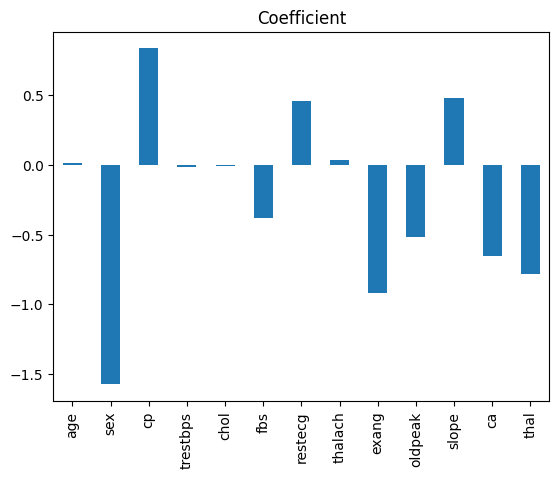

In [ ]:
Feature=pd.DataFrame(final,index=[0]).T.plot.bar(title='Coefficient',
                               legend=False)


## from the graph we can see sex,cp exang, and thal contributing max to prediction column 'Target'